# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_results_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
print(combined_results_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [10]:
# Checking the number of mice.
len(combined_results_df["Mouse ID"].unique())

249

In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = combined_results_df[combined_results_df["Mouse ID"].isin(duplicate_mouse_id)]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_results_clean = combined_results_df[~ combined_results_df["Mouse ID"].isin(duplicate_mouse_id)]
combined_results_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice in the clean DataFrame.
len(combined_results_clean["Mouse ID"].unique())

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_group = combined_results_clean.groupby("Drug Regimen")
mean = drug_group["Tumor Volume (mm3)"].mean()
median = drug_group["Tumor Volume (mm3)"].median()
var = drug_group["Tumor Volume (mm3)"].var()
std = drug_group["Tumor Volume (mm3)"].std()
sem = drug_group["Tumor Volume (mm3)"].sem()

drug_tumor_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": std, "SEM": sem})
drug_tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_agg = combined_results_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

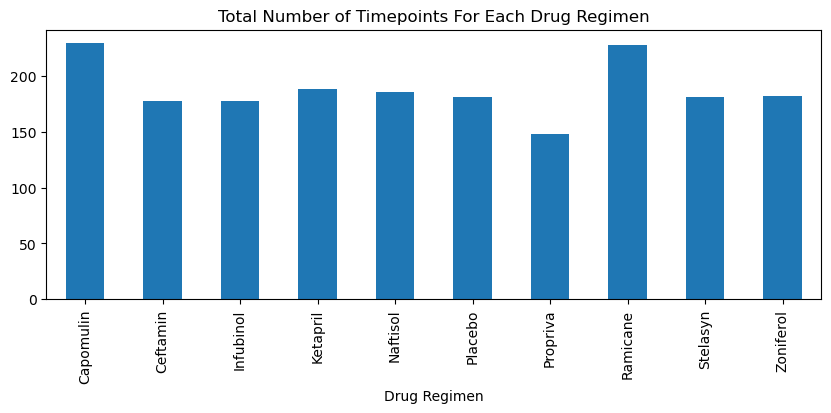

<Figure size 640x480 with 0 Axes>

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_drug = combined_results_clean.groupby("Drug Regimen")["Timepoint"].count()
timepoint_drug.plot(kind="bar", figsize=(10,3.5))
plt.title("Total Number of Timepoints For Each Drug Regimen")
plt.show()
plt.tight_layout()

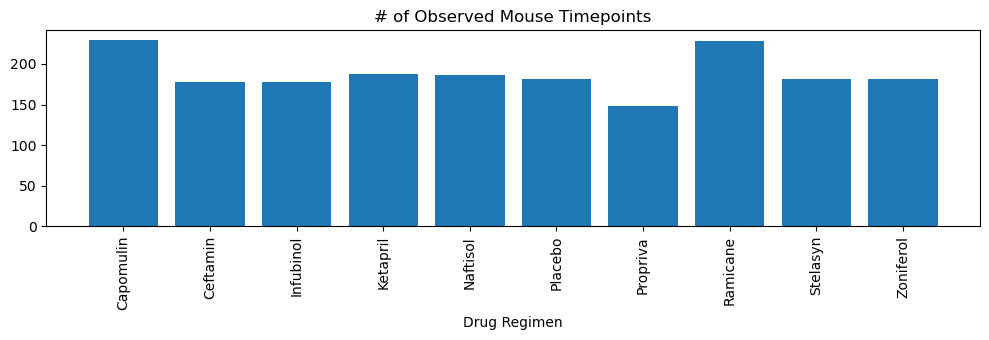

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
import numpy as np

drug_regimen = combined_results_clean["Drug Regimen"].sort_values().unique()
timepoint_count = combined_results_clean.groupby("Drug Regimen")["Timepoint"].count()

x_axis = np.arange(len(drug_regimen))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(10, 3.5))
plt.title("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

plt.bar(x_axis, timepoint_count, alpha=1, align="center")
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

plt.tight_layout()
plt.show()


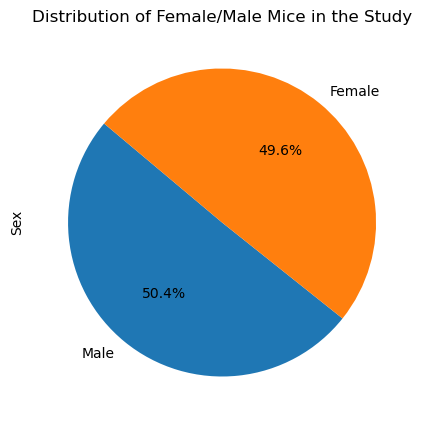

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata_clean = mouse_metadata.loc[~mouse_metadata["Mouse ID"].isin(duplicate_mouse_id)]
distribution = mouse_metadata_clean["Sex"].value_counts()

distribution.plot(kind="pie", figsize=(5,5), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Female/Male Mice in the Study")
plt.show()

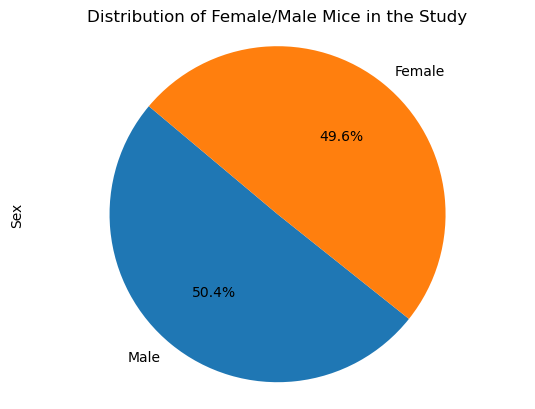

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_metadata_clean["Sex"].unique()
plt.pie(distribution, labels=labels ,autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Distribution of Female/Male Mice in the Study")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = combined_results_clean.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(max_tp, combined_results_clean, how="left", on=["Mouse ID", "Timepoint"])


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    final_tumor_treatment = final_tumor.loc[final_tumor["Drug Regimen"] == treatment]
    
    # add subset 
    final_tumor_vol.append(final_tumor_treatment["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
for index, treatment in enumerate(final_tumor_vol):
    treatment_name = treatments[index]
    
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {treatment_name} is: {round(lowerq,2)}.")
    print(f"The upper quartile of {treatment_name} is: {round(upperq,2)}.")
    print(f"The interquartile range of {treatment_name} is: {round(iqr,2)}.")
    print(f"The the median of {treatment_name} is: {round(quartiles[0.5],2)}.")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers for {treatment_name}.")
    print(f"Values above {round(upper_bound,2)} could be outliers for {treatment_name}.")
    outliers = (final_tumor.loc[(final_tumor["Drug Regimen"] == treatment_name) & ((final_tumor["Tumor Volume (mm3)"] < lower_bound) | (final_tumor["Tumor Volume (mm3)"] > upper_bound))])
    outliers_no = len(outliers)
    print(f"The number of outliers for {treatment_name} is: {outliers_no}.")
    if outliers_no > 0:
        outlier_list = outliers["Mouse ID"].to_numpy()
        print(f"The outliers are: {outlier_list}.")
    print("")

The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
The interquartile range of Capomulin is: 7.78.
The the median of Capomulin is: 38.13.
Values below 20.7 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.
The number of outliers for Capomulin is: 0.

The lower quartile of Ramicane is: 31.56.
The upper quartile of Ramicane is: 40.66.
The interquartile range of Ramicane is: 9.1.
The the median of Ramicane is: 36.56.
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.
The number of outliers for Ramicane is: 0.

The lower quartile of Infubinol is: 54.05.
The upper quartile of Infubinol is: 65.53.
The interquartile range of Infubinol is: 11.48.
The the median of Infubinol is: 60.17.
Values below 36.83 could be outliers for Infubinol.
Values above 82.74 could be outliers for Infubinol.
The number of outliers for Infubinol is: 1.
The outliers are: ['c326'].

The lower quartil

C:\Users\Kels\AppData\Local\Temp\ipykernel_1052\1765249162.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


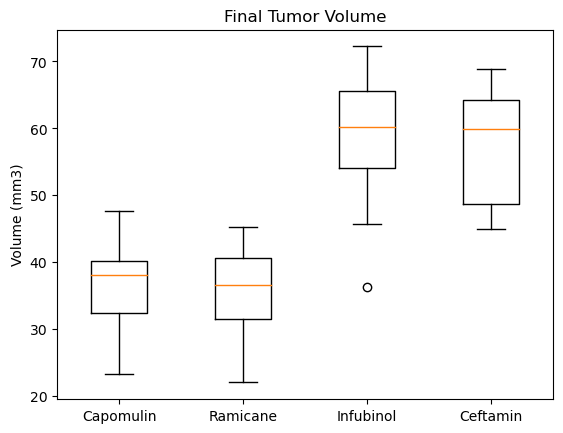

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Volume (mm3)')
ax1.set_xticklabels(treatments)
blue_square = dict(markerfacecolor='b',marker='s')
ax1.boxplot(final_tumor_vol)

plt.show()

## Line and Scatter Plots

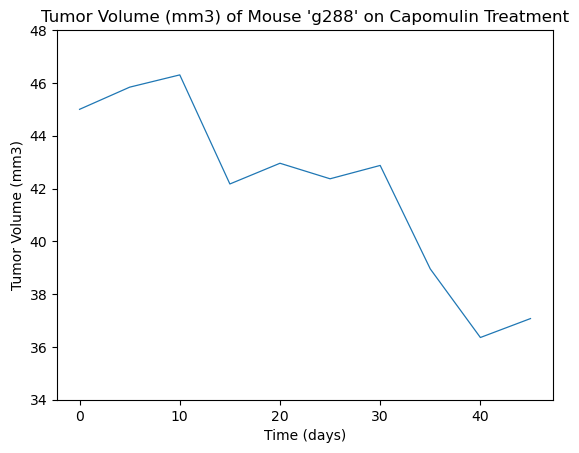

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
g288_df = combined_results_clean.loc[combined_results_clean['Mouse ID'] == 'g288']
g288_time = g288_df['Timepoint']
g288_volume = g288_df['Tumor Volume (mm3)']

plt.plot(g288_time,g288_volume,linewidth=0.9)
plt.title("Tumor Volume (mm3) of Mouse 'g288' on Capomulin Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(34,48)
plt.show()

C:\Users\Kels\AppData\Local\Temp\ipykernel_1052\3817920582.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avgs = capomulin_df.groupby(['Mouse ID']).mean()


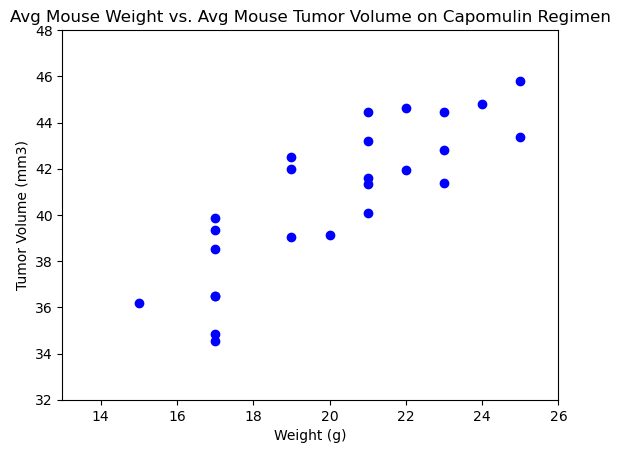

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
capomulin_df = combined_results_clean.loc[(combined_results_clean['Drug Regimen'] == 'Capomulin')]
capomulin_avgs = capomulin_df.groupby(['Mouse ID']).mean()


weight = capomulin_avgs['Weight (g)']
volume = capomulin_avgs['Tumor Volume (mm3)']

marker_size = 10
plt.scatter(weight,volume,color='blue')
plt.title('Avg Mouse Weight vs. Avg Mouse Tumor Volume on Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(13,26)
plt.ylim(32,48)
plt.show()

## Correlation and Regression

The correlation between weight and tumor volume is 0.84.


Text(15, 43.5, 'y = 0.95x + 21.55')

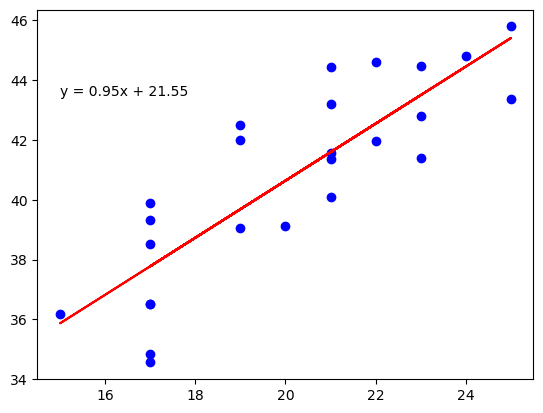

In [78]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(weight,volume)[0],2)
print(f'The correlation between weight and tumor volume is {correlation}.')

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,volume)
regression_values = weight * slope + intercept
slope_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,volume,color='blue')
plt.plot(weight,regression_values,"r-")
plt.annotate(slope_equation,(15,43.5),color='black')